In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('../kdd2004.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [4]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', 'target'],
      dtype='object')

In [6]:
df.target.unique()


array([-1,  1])

In [8]:
df.target = df.target.map({-1:0, 1:1})
df.target

0         0
1         0
2         0
3         0
4         0
         ..
145746    0
145747    0
145748    1
145749    0
145750    1
Name: target, Length: 145751, dtype: int64

In [10]:
df.target.value_counts(normalize=True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
?df.drop

Signature:
df.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list

In [17]:
X = df.drop(columns = 'target', axis = 1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,-8.0,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,-6.0,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,7.0,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,6.0,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,-14.0,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23


In [20]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102025, 74), (102025,), (43726, 74), (43726,))

# Model training

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
import sklearn.ensemble

In [25]:
dir(sklearn.ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'HistGradientBoostingClassifier',
 'HistGradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gradient_boosting',
 '_hist_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting']

In [26]:
?RandomForestClassifier

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeClassifier`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the

In [27]:
rf = RandomForestClassifier(n_estimators = 100, max_depth=2, n_jobs=-1, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=0)

In [28]:
dir(rf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_estimators_indices',
 '_get_metadata_request',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_n_samples',
 '_n_samples_bootstrap',
 '_parameter_c

In [33]:
y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='deprecated',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
floats for optimal performance; any other input format will be converted
(and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization
with primal formulation, or no regularization. The 'liblinear' solver
supports both L1 and L2 regularization, with a dual formulation only for


In [36]:
lr = LogisticRegression(max_iter=100, random_state=0)
lr.fit(X_train, y_train)

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [37]:
y_train_lr = lr.predict_proba(X_train)[:,1]
y_test_lr = lr.predict_proba(X_test)[:,1]

In [38]:
y_train_lr[:5]

array([9.45667216e-04, 3.57411829e-05, 3.58052570e-03, 2.54739514e-02,
       8.52371267e-05])

# Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [44]:
y_test_base = pd.Series(np.zeros(len(y_test)))
y_test_base.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

Text(0.5, 1.0, 'Baseline CM')

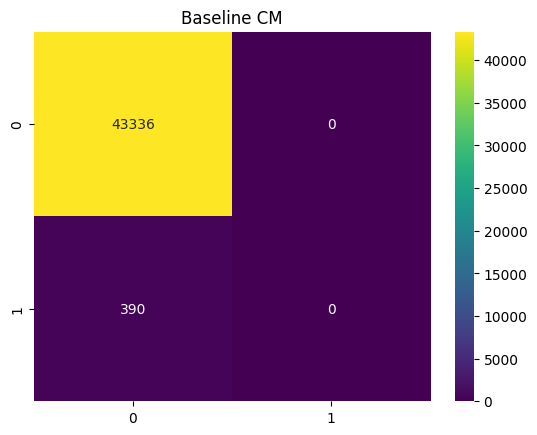

In [47]:
cm = confusion_matrix(y_test, y_test_base, labels=[0,1])
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Baseline CM')

In [50]:
?confusion_matrix

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` and
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array-like of shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like of shape (n_classes), default=None
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If

Text(0.5, 1.0, "RF's CM")

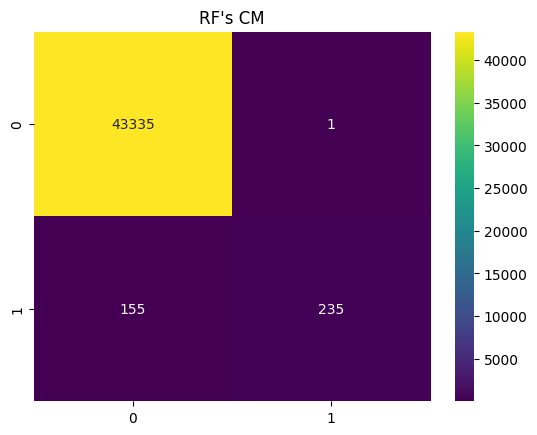

In [51]:
cm = confusion_matrix(y_test, rf.predict(X_test), labels=[0,1])
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("RF's CM")

Text(0.5, 1.0, "LR's CM")

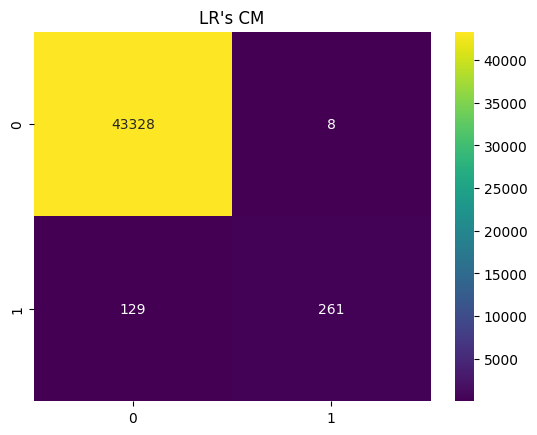

In [52]:
cm = confusion_matrix(y_test, lr.predict(X_test), labels=[0,1])
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title("LR's CM")

# False Positive Rate, FPR and False Negative Rate, FNR

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_base, labels=[0,1]).ravel()
FPR_base = fp/(fp+tn)
FNR_base = fn/(fn+tp)

In [60]:
tn, fp, fn, tp = confusion_matrix(y_test, rf.predict(X_test), labels=[0,1]).ravel()
FPR_rf = fp/(fp+tn)
FNR_rf = fn/(fn+tp)

In [63]:
tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(X_test), labels=[0.,1]).ravel()
FPR_lr = fp/(fp + tn)
FNR_lr = fn/(fn + tp)

In [64]:
print(f"""
Baseline FPR: {FPR_base}
Baseline FNR: {FNR_base}

RF's FPR: {FPR_rf}
RF's FNR: {FNR_rf}

LR's FPR: {FPR_lr}
LR's FNR: {FNR_lr}
      """)


Baseline FPR: 0.0
Baseline FNR: 1.0

RF's FPR: 2.3075503045966402e-05
RF's FNR: 0.3974358974358974

LR's FPR: 0.00018460402436773122
LR's FNR: 0.33076923076923076
      


# FPR and FNR vs probability thresholds

In [66]:
?np.linspace

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
    *,
    device=None,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7f2e003935b0>
File:            ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/numpy/_core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence,

In [68]:
thresholds = np.linspace(0, 1, 100)
len(thresholds)

100

In [71]:
probs = lr.predict_proba(X_test)[:,1]
probs[:5]

array([3.81858873e-03, 2.34445745e-04, 2.70338743e-05, 2.66290334e-04,
       2.44051125e-05])

In [73]:
fpr_ls = []
fnr_ls = []

#probabilities that will be test against the threshold
probs = lr.predict_proba(X_test)[:,1]

for threshold in thresholds:
    '''
    Each iteration produce a single FPR value.
    In normal case we would use the y_test_predict which is something to the effect of: model.predict(X_test).
    However, using the .predict() method is under the assumptiont that the threshold is 0.5. 
    In here we are shown that the FPR and FNR is probability threshold-dependent.
    We are looking to obtain the optimum threshold value where we would be able to minimize the FPR or FNR, depending on our specific use case.
    This is the kernel of data science. 
    Modifying underlying value as opposed to using the out of the box value that is suitable for general cases.
    '''

    condition = probs >= threshold
    y_test_predict_manual = np.where(condition, 1, 0)

    tn, fp, fn, tp = confusion_matrix(y_test, y_test_predict_manual, labels=[0,1]).ravel()

    FPR = fp/(fp+tn)
    FNR = fn/(fn+tp)

    fpr_ls.append(FPR)
    fnr_ls.append(FNR)


In [76]:
fpr_ls

[np.float64(1.0),
 np.float64(0.05766568211187004),
 np.float64(0.02840594424958464),
 np.float64(0.01756045781798043),
 np.float64(0.012045412589994461),
 np.float64(0.009414805242754292),
 np.float64(0.007407236477755215),
 np.float64(0.006045781798043198),
 np.float64(0.005007384160974709),
 np.float64(0.00410743954218202),
 np.float64(0.003507476462986893),
 np.float64(0.003161343917297397),
 np.float64(0.002745984862470002),
 np.float64(0.002538305335056304),
 np.float64(0.002238323795458741),
 np.float64(0.00205371977109101),
 np.float64(0.0019383422558611777),
 np.float64(0.00173066272844748),
 np.float64(0.0014999076979878162),
 np.float64(0.0013614546797120178),
 np.float64(0.0011306996492523537),
 np.float64(0.0010153221340225217),
 np.float64(0.0009230201218386561),
 np.float64(0.0008999446187926897),
 np.float64(0.0008768691157467233),
 np.float64(0.0007614916005168913),
 np.float64(0.0007384160974709249),
 np.float64(0.0006922650913789921),
 np.float64(0.000669189588333025

In [77]:
dir(fpr_ls)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [80]:
fpr_ls.count

<function list.count(value, /)>

In [81]:
?fpr_ls.count

Signature: fpr_ls.count(value, /)
Docstring: Return number of occurrences of value.
Type:      builtin_function_or_method

In [84]:
pd.Series(fpr_ls)

0     1.000000
1     0.057666
2     0.028406
3     0.017560
4     0.012045
        ...   
95    0.000023
96    0.000023
97    0.000023
98    0.000023
99    0.000000
Length: 100, dtype: float64

In [87]:
metrics = pd.concat([pd.Series(fpr_ls), pd.Series(fnr_ls)], axis=1)
metrics.head()

,0,1
0,1.000000,0.000000
1,0.057666,0.094872
2,0.028406,0.143590
3,0.017560,0.158974
4,0.012045,0.174359


In [103]:
metrics.columns = ['FPR', 'FNR']

In [90]:
metrics.index

RangeIndex(start=0, stop=100, step=1)

In [91]:
dir(metrics.index)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accesso

In [96]:
len(metrics.index), len(thresholds)

(100, 100)

In [97]:
metrics.index = thresholds

In [99]:
type(metrics.index)

pandas.core.indexes.base.Index

In [100]:
metrics.head()

,0,1
0.000000,1.000000,0.000000
0.010101,0.057666,0.094872
0.020202,0.028406,0.143590
0.030303,0.017560,0.158974
0.040404,0.012045,0.174359


In [ ]:
metrics.columns = ['']

RangeIndex(start=0, stop=2, step=1)

In [104]:
metrics.head()

,FPR,FNR
0.000000,1.000000,0.000000
0.010101,0.057666,0.094872
0.020202,0.028406,0.143590
0.030303,0.017560,0.158974
0.040404,0.012045,0.174359


Text(0, 0.5, 'FPR/FNR')

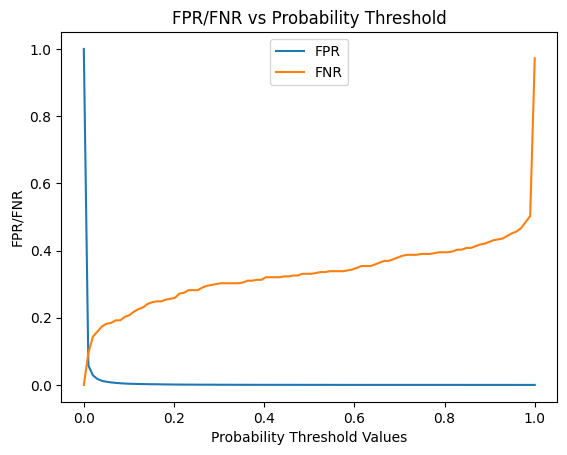

In [109]:
sns.lineplot(x=metrics.index, y='FPR', data=metrics, label='FPR')
sns.lineplot(x=metrics.index, y='FNR', data=metrics, label='FNR')
plt.title('FPR/FNR vs Probability Threshold')
plt.xlabel('Probability Threshold Values')
plt.ylabel('FPR/FNR')

In [110]:
dir(metrics)

['FNR',
 'FPR',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 

In [112]:
?metrics.plot

Signature:      metrics.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7f2d7c89b910>
File:           ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' :

<Axes: title={'center': 'Test'}>

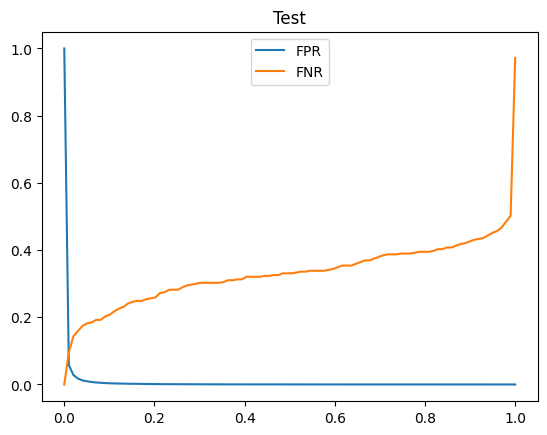

In [113]:
metrics.plot(title='Test')

In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [119]:
precision_score(y_test, lr.predict(X_test))



0.9702602230483272

In [120]:
recall_score(y_test, lr.predict(X_test))


0.6692307692307692

In [121]:
f1_score(y_test, lr.predict(X_test))

0.7921092564491654

In [122]:
precision_ls = []
recall_ls = []
fscore_ls = []

#probabilities that will be test against the threshold
probs = lr.predict_proba(X_test)[:,1]

for threshold in thresholds:
    '''
    Each iteration produce a single precision, recall, fscore
    '''

    condition = probs >= threshold
    y_test_predict_manual = np.where(condition, 1, 0)

    precise = precision_score(y_test, y_test_predict_manual)
    recall = recall_score(y_test, y_test_predict_manual)
    fscore = f1_score(y_test, y_test_predict_manual)
 
    precision_ls.append(precise)
    recall_ls.append(recall)
    fscore_ls.append(fscore)


In [125]:
precision_series = pd.Series(precision_ls)
recall_series = pd.Series(recall_ls)
fscore_series = pd.Series(fscore_ls)

In [128]:
?pd.concat

Signature:
pd.concat(
    objs: 'Iterable[Series | DataFrame] | Mapping[HashableT, Series | DataFrame]',
    *,
    axis: 'Axis' = 0,
    join: 'str' = 'outer',
    ignore_index: 'bool' = False,
    keys: 'Iterable[Hashable] | None' = None,
    levels=None,
    names: 'list[HashableT] | None' = None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool | None' = None,
) -> 'DataFrame | Series'
Docstring:
Concatenate pandas objects along a particular axis.

Allows optional set logic along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
  

In [129]:
metrics2 = pd.concat([precision_series, recall_series, fscore_series], axis = 1)
metrics2.head()

,0,1,2
0,0.008919,1.000000,0.017681
1,0.123773,0.905128,0.217767
2,0.213419,0.856410,0.341688
3,0.301194,0.841026,0.443543
4,0.381517,0.825641,0.521880


In [136]:
metrics2.columns = ['Precision', 'Recall', 'Fscore']

In [130]:
len(metrics2.index), len(thresholds)

(100, 100)

In [134]:
metrics2.index = thresholds
len(metrics2.index)

100

In [137]:
metrics2.head()

,Precision,Recall,Fscore
0.000000,0.008919,1.000000,0.017681
0.010101,0.123773,0.905128,0.217767
0.020202,0.213419,0.856410,0.341688
0.030303,0.301194,0.841026,0.443543
0.040404,0.381517,0.825641,0.521880


<Axes: >

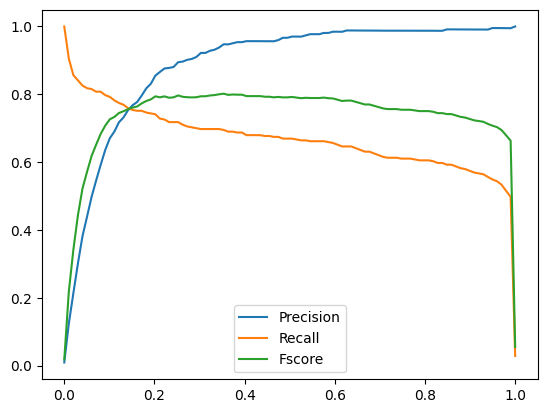

In [138]:
metrics2.plot()

In [139]:
import yellowbrick.classifier

In [140]:
dir(yellowbrick.classifier)

['ClassBalance',
 'ClassPredictionError',
 'ClassificationReport',
 'ClassificationScoreVisualizer',
 'ConfusionMatrix',
 'DiscriminationThreshold',
 'PRCurve',
 'PrecisionRecallCurve',
 'ROCAUC',
 'ScoreVisualizer',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'class_balance',
 'class_prediction_error',
 'classification_report',
 'confusion_matrix',
 'discrimination_threshold',
 'prcurve',
 'precision_recall_curve',
 'roc_auc',
 'rocauc',
 'threshold']

In [141]:
from yellowbrick.classifier import DiscriminationThreshold

In [144]:
?DiscriminationThreshold

Init signature:
DiscriminationThreshold(
    estimator,
    ax=None,
    n_trials=50,
    cv=0.1,
    fbeta=1.0,
    argmax='fscore',
    exclude=None,
    quantiles=array([0.1, 0.5, 0.9]),
    random_state=None,
    is_fitted='auto',
    force_model=False,
    **kwargs,
)
Docstring:     
Visualizes how precision, recall, f1 score, and queue rate change as the
discrimination threshold increases. For probabilistic, binary classifiers,
the discrimination threshold is the probability at which you choose the
positive class over the negative. Generally this is set to 50%, but
adjusting the discrimination threshold will adjust sensitivity to false
positives which is described by the inverse relationship of precision and
recall with respect to the threshold.

The visualizer also accounts for variability in the model by running
multiple trials with different train and test splits of the data. The
variability is visualized using a band such that the curve is drawn as the
median score of each tr

In [145]:
help(DiscriminationThreshold)

Help on class DiscriminationThreshold in module yellowbrick.classifier.threshold:

class DiscriminationThreshold(yellowbrick.base.ModelVisualizer)
 |  DiscriminationThreshold(estimator, ax=None, n_trials=50, cv=0.1, fbeta=1.0, argmax='fscore', exclude=None, quantiles=array([0.1, 0.5, 0.9]), random_state=None, is_fitted='auto', force_model=False, **kwargs)
 |  
 |  Visualizes how precision, recall, f1 score, and queue rate change as the
 |  discrimination threshold increases. For probabilistic, binary classifiers,
 |  the discrimination threshold is the probability at which you choose the
 |  positive class over the negative. Generally this is set to 50%, but
 |  adjusting the discrimination threshold will adjust sensitivity to false
 |  positives which is described by the inverse relationship of precision and
 |  recall with respect to the threshold.
 |  
 |  The visualizer also accounts for variability in the model by running
 |  multiple trials with different train and test splits of

In [146]:
visualizer = DiscriminationThreshold(lr, cv=0.5, argmax='fscore', exclude = 'queue_rate')


In [148]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_build_request_for_signature',
 '_check_argmax',
 '_check_cv',
 '_check_exclude',
 '_check_feature_names',
 '_check_n_features',
 '_check_quantiles',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fig',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_size',
 '_split_fit_score_trial',
 '_validate_data',
 '_validate_params',
 '_wrapped',
 'argmax',
 'ax',
 'c

In [153]:
plt.rcParams['font.family'] = 'Dejavu Sans'

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


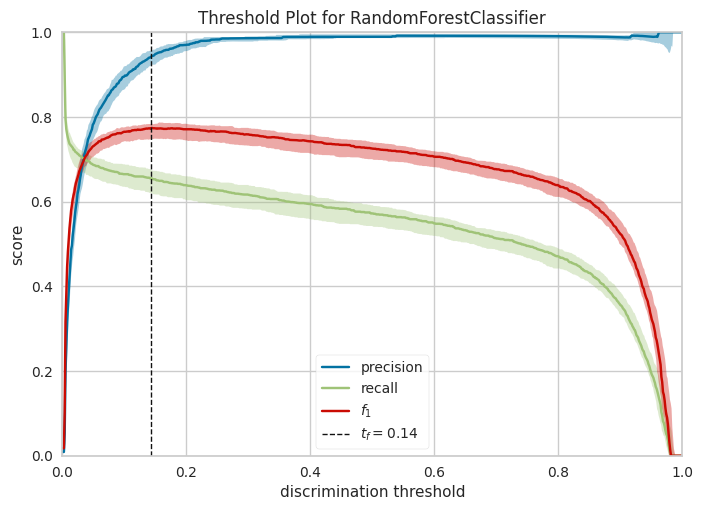

<Axes: title={'center': 'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [155]:
visualizer = DiscriminationThreshold(rf, cv=0.5, argmax='fscore', exclude = 'queue_rate')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [166]:
metrics2.Fscore.max()

np.float64(0.8017751479289941)

In [168]:
metrics2.Fscore.argmax

<bound method IndexOpsMixin.argmax of 0.000000    0.017681
0.010101    0.217767
0.020202    0.341688
0.030303    0.443543
0.040404    0.521880
              ...   
0.959596    0.703151
0.969697    0.694491
0.979798    0.679054
0.989899    0.663248
1.000000    0.054863
Name: Fscore, Length: 100, dtype: float64>

In [171]:
?print

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method

In [172]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [178]:
metrics2.Fscore.head(50)

0.000000    0.017681
0.010101    0.217767
0.020202    0.341688
0.030303    0.443543
0.040404    0.521880
0.050505    0.571173
0.060606    0.618076
0.070707    0.651499
0.080808    0.683297
0.090909    0.707622
0.101010    0.726204
0.111111    0.733173
0.121212    0.744760
0.131313    0.750000
0.141414    0.756066
0.151515    0.760673
0.161616    0.764016
0.171717    0.773087
0.181818    0.780161
0.191919    0.784844
0.202020    0.793956
0.212121    0.791086
0.222222    0.793829
0.232323    0.789845
0.242424    0.790960
0.252525    0.796586
0.262626    0.792561
0.272727    0.791367
0.282828    0.790765
0.292929    0.791304
0.303030    0.794161
0.313131    0.794161
0.323232    0.796486
0.333333    0.797654
0.343434    0.800000
0.353535    0.801775
0.363636    0.798220
0.373737    0.799406
0.383838    0.798808
0.393939    0.798808
0.404040    0.794603
0.414141    0.794603
0.424242    0.794603
0.434343    0.794603
0.444444    0.792793
0.454545    0.792793
0.464646    0.790977
0.474747    0

In [179]:
metrics2.Fscore.tail(50)

0.505051    0.792109
0.515152    0.790274
0.525253    0.788432
0.535354    0.789634
0.545455    0.788991
0.555556    0.788991
0.565657    0.788991
0.575758    0.790199
0.585859    0.788344
0.595960    0.787692
0.606061    0.783951
0.616162    0.780186
0.626263    0.781395
0.636364    0.781395
0.646465    0.777605
0.656566    0.773791
0.666667    0.769953
0.676768    0.769953
0.686869    0.766091
0.696970    0.762205
0.707071    0.758294
0.717172    0.756329
0.727273    0.756329
0.737374    0.756329
0.747475    0.754358
0.757576    0.754358
0.767677    0.754358
0.777778    0.752381
0.787879    0.750397
0.797980    0.750397
0.808081    0.750397
0.818182    0.748408
0.828283    0.744409
0.838384    0.744409
0.848485    0.741573
0.858586    0.741573
0.868687    0.737520
0.878788    0.733441
0.888889    0.731392
0.898990    0.727273
0.909091    0.723127
0.919192    0.721044
0.929293    0.718954
0.939394    0.712644
0.949495    0.707438
0.959596    0.703151
0.969697    0.694491
0.979798    0

In [161]:
dir(metrics2.Fscore)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__

<Axes: >

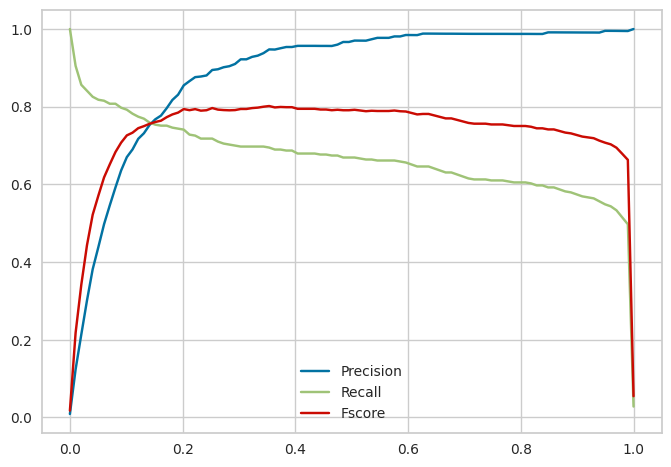

In [154]:
metrics2.plot()

/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/max/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver option

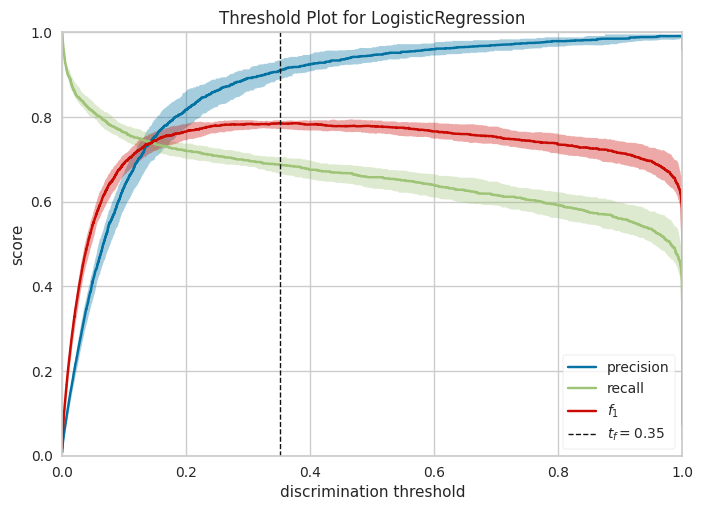

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [180]:
visualizer = DiscriminationThreshold(lr, cv=0.5, argmax='fscore', exclude = 'queue_rate')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [ ]:
plt.rcParams["font.family"] = "DejaVu Sans"  # Change to a known font

In [152]:
?plt.rcParams

Type:        RcParams
String form:
_internal.classic_mode: False
           agg.path.chunksize: 0
           animation.bitrate: -1
           animation.codec: h264
           a <...> : True
           ytick.minor.size: 0.0
           ytick.minor.visible: False
           ytick.minor.width: 0.5
           ytick.right: False
Length:      322
File:        ~/Udemy/Udemy/machine_learning_imbalanced_data/.venv/lib/python3.10/site-packages/matplotlib/__init__.py
Docstring:  
A dict-like key-value store for config parameters, including validation.

Validating functions are defined and associated with rc parameters in
:mod:`matplotlib.rcsetup`.

The list of rcParams is:

- _internal.classic_mode
- agg.path.chunksize
- animation.bitrate
- animation.codec
- animation.convert_args
- animation.convert_path
- animation.embed_limit
- animation.ffmpeg_args
- animation.ffmpeg_path
- animation.frame_format
- animation.html
- animation.writer
- axes.autolimit_mode
- axes.axisbelow
- axes.edgecolor
- axes